# Analysis

### Preliminaries

In [1]:
# Imports
import sys
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from tqdm import tqdm
import imageio
from datetime import datetime

# Magics
%matplotlib inline
%load_ext autoreload
%autoreload 2

## Data Load

In [2]:
class Data:
    def __init__(self) -> None:
        self.sub = pd.read_csv("data/subjective.csv")

        self.h_1 = pd.read_csv("data/1/h.csv")
        self.vh_1 = pd.read_csv("data/1/vh.csv")
        self.v_1 = pd.read_csv("data/1/v.csv")

        self.h_2 = pd.read_csv("data/2/h.csv")
        self.vh_2 = pd.read_csv("data/2/vh.csv")
        self.v_2 = pd.read_csv("data/2/v.csv")

        self.h_3 = pd.read_csv("data/3/h.csv")
        self.vh_3 = pd.read_csv("data/3/vh.csv")
        self.v_3 = pd.read_csv("data/3/v.csv")

        self.h_4 = pd.read_csv("data/4/h.csv")
        self.vh_4 = pd.read_csv("data/4/vh.csv")
        self.v_4 = pd.read_csv("data/4/v.csv")

        self.h_5 = pd.read_csv("data/5/h.csv")
        self.vh_5 = pd.read_csv("data/5/vh.csv")
        self.v_5 = pd.read_csv("data/5/v.csv")

## Background Data

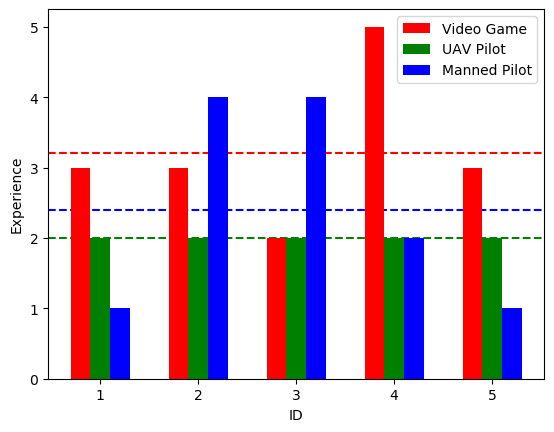

In [43]:
data = Data()
vg = list(data.sub["VG_Experience"]); vg_mean = (np.mean(vg))
uav = list(data.sub["UAV_Experience"]); uav_mean = (np.mean(uav))
p = list(data.sub["Pilot_Experience"]); p_mean = (np.mean(p))

# categories = ("Video Game", "UAV Piloting", "Manned Piloting")
# # a = (vg[0], uav[0], p[0])
# # b = (vg[1], uav[1], p[1])
# # c = (vg[2], uav[2], p[2])
# # d = (vg[3], uav[3], p[3])
# # e = (vg[4], uav[4], p[4])

categories = ('1', '2', '3', '4', '5')

x = np.arange(len(categories))
width = 0.2

plt.bar(x - width, vg, width, color='red')
plt.bar(x, uav, width, color='green')
plt.bar(x + width, p, width, color='blue')

plt.xticks(x, categories)
plt.xlabel("ID")
plt.ylabel("Experience")
plt.legend(["Video Game", "UAV Pilot", "Manned Pilot"])



plt.axhline(vg_mean, linestyle='dashed',  color='red', zorder=0)
plt.axhline(uav_mean, linestyle='dashed',  color='green', zorder=0)
plt.axhline(p_mean, linestyle='dashed',  color='blue', zorder=0)

plt.show()

/tmp/ipykernel_65535/282959634.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['keydown'] = keydown
/tmp/ipykernel_65535/282959634.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['good'] = good
/tmp/ipykernel_65535/282959634.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

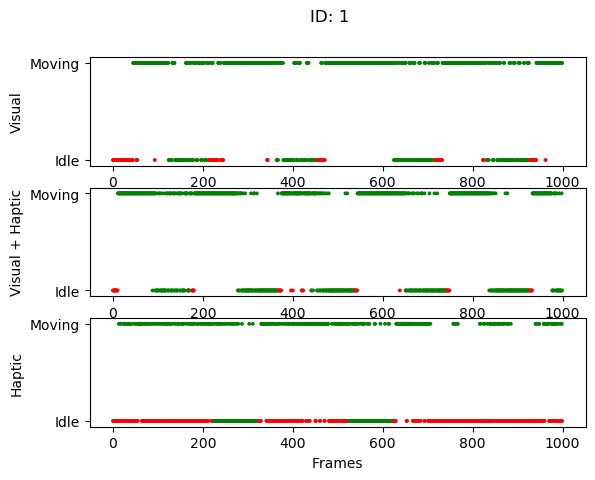

In [120]:
data = Data()

data_1 = [data.v_1, data.vh_1, data.h_1]
y = ['Visual', 'Visual + Haptic', 'Haptic']
plt.suptitle('ID: 1')

ax = []
s=3

for i in range(3):

    data_1[i] = data_1[i].replace({True: 1, False: 0})

    df = data_1[i][['frame','key_up', 'key_down', 'key_left', 'key_right', 'interacting']]

    keydown = df['key_up'] | df['key_down'] | df['key_left'] | df['key_right']
    df['keydown'] = keydown

    good = df['keydown'] | df['interacting']
    df['good'] = good
    df['good'] = df['good'].replace({1 : 'Green', 0 : 'red'})

    if i == 0:
        ax_i = plt.subplot(3, 1, i + 1)
        ax.append(ax_i)
    else:  
        ax_i = plt.subplot(3, 1, i + 1, sharex=ax[0], sharey=ax[0])
        ax.append(ax_i)
    plt.scatter(df['frame'], df['keydown'], s=s, color=df['good'])
    # plt.scatter(df['frame'][70], df['keydown'][70], s=s, color='green')
    plt.xlabel('Frames')
    plt.ylabel(y[i])
    plt.yticks([0, 1], ['Idle', 'Moving'])
    # plt.legend(['Idle Outside Waypoint', 'Moving or at Waypoint'])

plt.show()

# plt.figure(1)
# plt.subplot(3, 5, 1)


In [113]:
data = Data()

data_1 = [[data.v_1, data.vh_1, data.h_1], [data.v_2, data.vh_2, data.h_2], [data.v_3, data.vh_3, data.h_3], \
          [data.v_4, data.vh_4, data.h_4], [data.v_5, data.vh_5, data.h_5]]
y = ['Visual', 'Visual + Haptic', 'Haptic']
titles = ['User: 1', 'User: 2', 'User: 3', 'User: 4', 'User: 5']

idle_frames = np.zeros((3, 5))

ax = []

for i in range(3):
    for j in range(5):
    
        data_1[j][i] = data_1[j][i].replace({True: 1, False: 0})

        df = data_1[j][i][['frame','key_up', 'key_down', 'key_left', 'key_right', 'interacting']]

        keydown = df['key_up'] | df['key_down'] | df['key_left'] | df['key_right']
        df['keydown'] = keydown

        good = df['keydown'] | df['interacting']
        df['good'] = good
        # df['good'] = df['good'].replace({1 : 'Green', 0 : 'red'})

        # if i == 0:
        #     ax_i = plt.subplot(3, 5, 5*i + j + 1)
        #     ax.append(ax_i)
        # else:  
        #     ax_i = plt.subplot(3, 5, 5*i + j + 1, sharex=ax[0], sharey=ax[0])
        #     ax.append(ax_i)
        # plt.scatter(df['frame'], df['keydown'], color=df['good'])
        # plt.scatter(df['frame'][70], df['keydown'][70], color='green')
        # plt.xlabel('Frames')
        
        # if j == 0:
        #     plt.ylabel(y[i])
        #     plt.yticks([0, 1], ['Idle', 'Moving'])
        # else:
        #     plt.tick_params(labelleft = False)
        # plt.legend(['Idle Outside Waypoint', 'Moving or at Waypoint'])

        idle_frames[i, j] = np.count_nonzero(df['good'])

# plt.show()

print(idle_frames)

# plt.figure(1)
# plt.subplot(3, 5, 1)

[[881. 946. 901. 921. 911.]
 [953. 973. 967. 979. 960.]
 [514. 766. 476. 749. 134.]]


/tmp/ipykernel_65535/263043418.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['keydown'] = keydown
/tmp/ipykernel_65535/263043418.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['good'] = good
/tmp/ipykernel_65535/263043418.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

## Number of Waypoints

In [121]:
data = Data()

data_1 = [[data.v_1, data.vh_1, data.h_1], [data.v_2, data.vh_2, data.h_2], [data.v_3, data.vh_3, data.h_3], \
          [data.v_4, data.vh_4, data.h_4], [data.v_5, data.vh_5, data.h_5]]
y = ['Visual', 'Visual + Haptic', 'Haptic']
titles = ['User: 1', 'User: 2', 'User: 3', 'User: 4', 'User: 5']

waypoint_counts = np.zeros((3, 5))

ax = []

for i in range(3):
    for j in range(5):
    
        data_1[j][i] = data_1[j][i].replace({True: 1, False: 0})

        df = data_1[j][i][['waypoint_x']]

        unique = np.unique(df)
        # df['good'] = df['good'].replace({1 : 'Green', 0 : 'red'})

        # if i == 0:
        #     ax_i = plt.subplot(3, 5, 5*i + j + 1)
        #     ax.append(ax_i)
        # else:  
        #     ax_i = plt.subplot(3, 5, 5*i + j + 1, sharex=ax[0], sharey=ax[0])
        #     ax.append(ax_i)
        # plt.scatter(df['frame'], df['keydown'], color=df['good'])
        # plt.scatter(df['frame'][70], df['keydown'][70], color='green')
        # plt.xlabel('Frames')
        
        # if j == 0:
        #     plt.ylabel(y[i])
        #     plt.yticks([0, 1], ['Idle', 'Moving'])
        # else:
        #     plt.tick_params(labelleft = False)
        # plt.legend(['Idle Outside Waypoint', 'Moving or at Waypoint'])

        waypoint_counts[i, j] = len(unique)

# plt.show()

print(waypoint_counts)

[[5. 6. 6. 6. 6.]
 [6. 6. 6. 6. 7.]
 [3. 2. 3. 4. 1.]]
